### Setting up FourRooms

In [37]:
from deep_rl.component.fourrooms import *

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1f5b111eb8>,
 <matplotlib.image.AxesImage at 0x7f1f5b0ed240>)

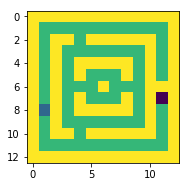

In [38]:
env = FourRooms(goal=47)
state = env.reset()
# print(state)
plt.subplot(121), plt.imshow(env.render())
# action = env.action_space.sample()
# state, reward, done, info = env.step(action)
# print(reward, done, info)
# plt.subplot(122), plt.imshow(state.reshape((13,13))); plt.show()
# print(action)

In [ ]:
env.observation_space

### Run DQN on 4 rooms

In [6]:
from deep_rl import *
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm
import random
import numpy as np
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim, hidden_units=(676,)))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 3e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 0
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 5e4
    config.async_actor = False
    agent = DQNAgent(config)
    #run_steps function below
    config = agent.config
    agent_name = agent.__class__.__name__
    t0 = time.time()
    while True:
        if config.save_interval and not agent.total_steps % config.save_interval:
            agent.save('data/%s-%s-%d' % (agent_name, config.tag, agent.total_steps))
        if config.log_interval and not agent.total_steps % config.log_interval:
            t0 = time.time()
        if config.eval_interval and not agent.total_steps % config.eval_interval:
            agent.eval_episodes()
            pass
        if config.max_steps and agent.total_steps >= config.max_steps:
            return agent
            break
        agent.step()
        agent.switch_task()
    return agent

2020-06-02 18:11:00,163 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-02 18:11:09,177 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-06-02 18:11:22,524 - root - INFO: steps 10000, episodic_return_test -160.70(24.86)
2020-06-02 18:11:37,988 - root - INFO: steps 15000, episodic_return_test -121.80(30.29)
2020-06-02 18:11:50,122 - root - INFO: steps 20000, episodic_return_test -161.10(24.61)
2020-06-02 18:12:03,187 - root - INFO: steps 25000, episodic_return_test -141.10(28.46)
2020-06-02 18:12:15,635 - root - INFO: steps 30000, episodic_return_test -140.50(28.74)
2020-06-02 18:12:28,339 - root - INFO: steps 35000, episodic_return_test -64.40(28.09)
2020-06-02 18:12:39,024 - root - INFO: steps 40000, episodic_return_test -45.30(24.48)
2020-06-02 18:12:50,667 - root - INFO: steps 45000, episodic_return_test -27.00(18.28)
2020-06-02 18:13:03,857 - root - INFO: steps 50000, episodic_return_test -29.50(18.04)
2020-06-02 18:13:15,002 - root - INFO: step

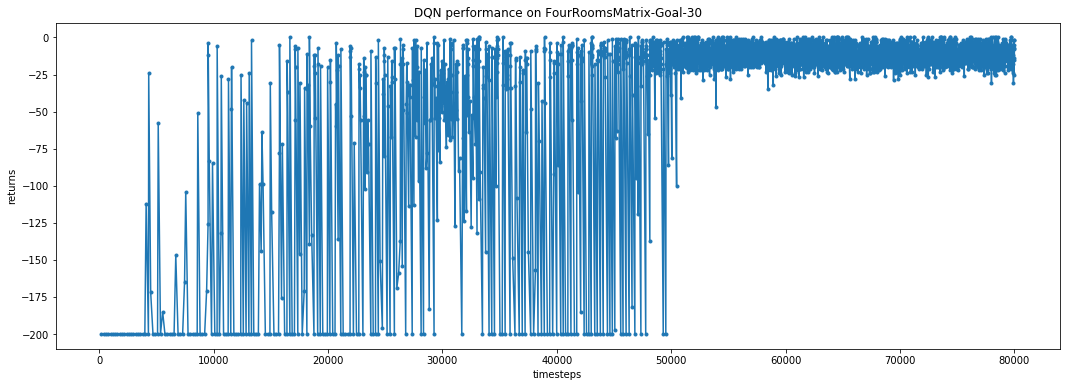

2020-06-02 18:14:24,823 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-02 18:14:36,628 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-06-02 18:14:48,872 - root - INFO: steps 10000, episodic_return_test -180.40(18.59)
2020-06-02 18:14:58,877 - root - INFO: steps 15000, episodic_return_test -200.00(0.00)
2020-06-02 18:15:10,726 - root - INFO: steps 20000, episodic_return_test -160.60(24.92)
2020-06-02 18:15:22,002 - root - INFO: steps 25000, episodic_return_test -180.70(18.31)
2020-06-02 18:15:34,165 - root - INFO: steps 30000, episodic_return_test -86.30(29.42)
2020-06-02 18:15:45,078 - root - INFO: steps 35000, episodic_return_test -143.60(27.26)
2020-06-02 18:15:55,122 - root - INFO: steps 40000, episodic_return_test -86.70(29.28)
2020-06-02 18:16:07,666 - root - INFO: steps 45000, episodic_return_test -144.00(27.05)
2020-06-02 18:16:25,847 - root - INFO: steps 50000, episodic_return_test -71.50(26.62)
2020-06-02 18:16:40,004 - root - INFO: step

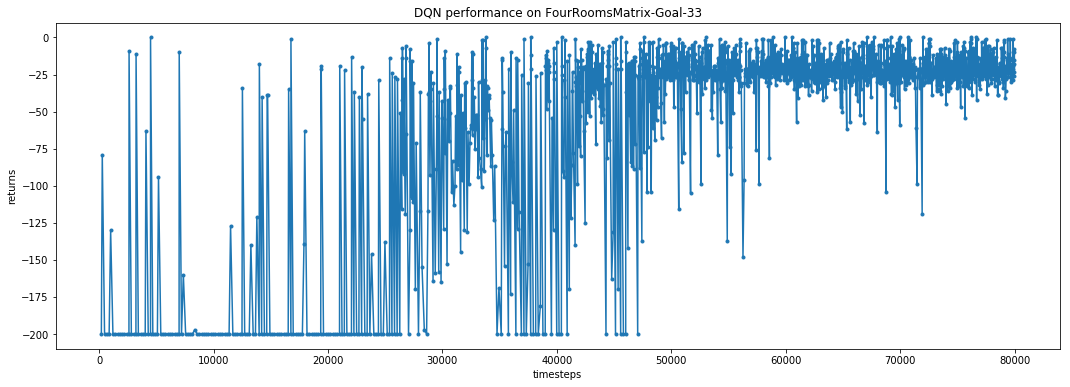

2020-06-02 18:17:45,485 - root - INFO: steps 0, episodic_return_test -180.10(18.88)
2020-06-02 18:17:55,642 - root - INFO: steps 5000, episodic_return_test -160.20(25.17)
2020-06-02 18:18:04,893 - root - INFO: steps 10000, episodic_return_test -140.50(28.74)
2020-06-02 18:18:15,449 - root - INFO: steps 15000, episodic_return_test -141.10(28.46)
2020-06-02 18:18:25,827 - root - INFO: steps 20000, episodic_return_test -46.30(24.31)
2020-06-02 18:18:37,888 - root - INFO: steps 25000, episodic_return_test -13.30(1.29)
2020-06-02 18:18:51,095 - root - INFO: steps 30000, episodic_return_test -29.70(17.99)
2020-06-02 18:19:01,457 - root - INFO: steps 35000, episodic_return_test -10.00(1.69)
2020-06-02 18:19:12,058 - root - INFO: steps 40000, episodic_return_test -10.80(1.34)
2020-06-02 18:19:24,516 - root - INFO: steps 45000, episodic_return_test -11.60(1.34)
2020-06-02 18:19:35,181 - root - INFO: steps 50000, episodic_return_test -12.40(1.39)
2020-06-02 18:19:47,436 - root - INFO: steps 5500

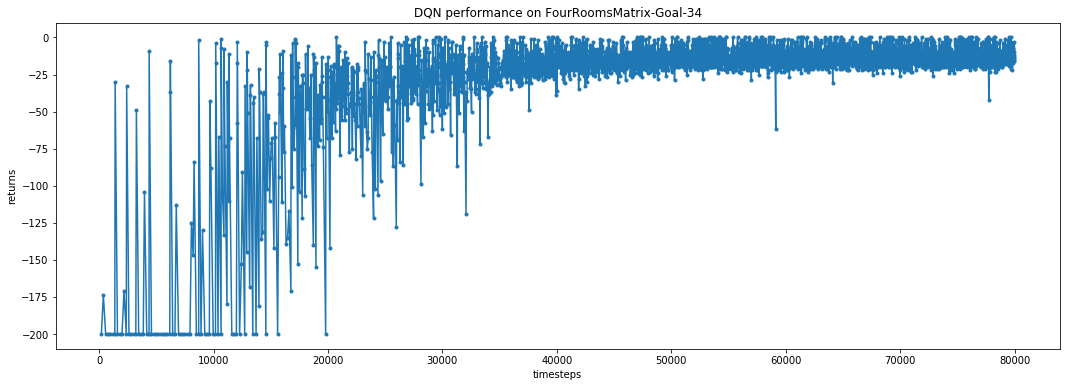

2020-06-02 18:20:54,782 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-02 18:21:10,851 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-06-02 18:21:19,929 - root - INFO: steps 10000, episodic_return_test -121.90(30.26)
2020-06-02 18:21:29,576 - root - INFO: steps 15000, episodic_return_test -84.00(29.96)
2020-06-02 18:21:39,038 - root - INFO: steps 20000, episodic_return_test -26.30(18.35)
2020-06-02 18:21:47,993 - root - INFO: steps 25000, episodic_return_test -7.00(1.27)
2020-06-02 18:21:56,770 - root - INFO: steps 30000, episodic_return_test -25.50(18.44)
2020-06-02 18:22:06,365 - root - INFO: steps 35000, episodic_return_test -44.10(24.69)
2020-06-02 18:22:16,170 - root - INFO: steps 40000, episodic_return_test -6.30(1.53)
2020-06-02 18:22:25,520 - root - INFO: steps 45000, episodic_return_test -9.80(1.08)
2020-06-02 18:22:35,043 - root - INFO: steps 50000, episodic_return_test -7.90(1.06)
2020-06-02 18:22:44,774 - root - INFO: steps 55000, epi

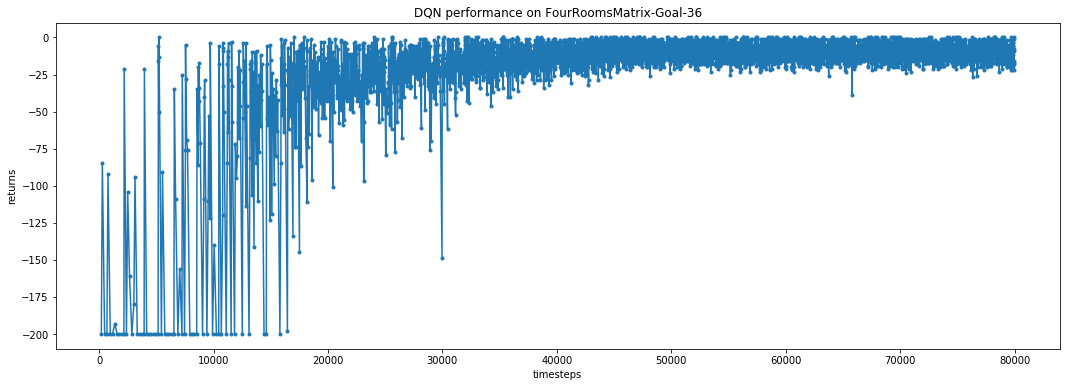

2020-06-02 18:23:37,714 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-02 18:23:47,329 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-06-02 18:23:56,306 - root - INFO: steps 10000, episodic_return_test -160.60(24.92)
2020-06-02 18:24:05,425 - root - INFO: steps 15000, episodic_return_test -180.40(18.59)
2020-06-02 18:24:14,451 - root - INFO: steps 20000, episodic_return_test -142.30(27.88)
2020-06-02 18:24:23,209 - root - INFO: steps 25000, episodic_return_test -200.00(0.00)
2020-06-02 18:24:32,479 - root - INFO: steps 30000, episodic_return_test -161.20(24.54)
2020-06-02 18:24:41,859 - root - INFO: steps 35000, episodic_return_test -125.60(28.83)
2020-06-02 18:24:51,013 - root - INFO: steps 40000, episodic_return_test -126.50(28.48)
2020-06-02 18:24:59,983 - root - INFO: steps 45000, episodic_return_test -17.30(1.82)
2020-06-02 18:25:09,185 - root - INFO: steps 50000, episodic_return_test -14.80(1.71)
2020-06-02 18:25:19,881 - root - INFO: steps

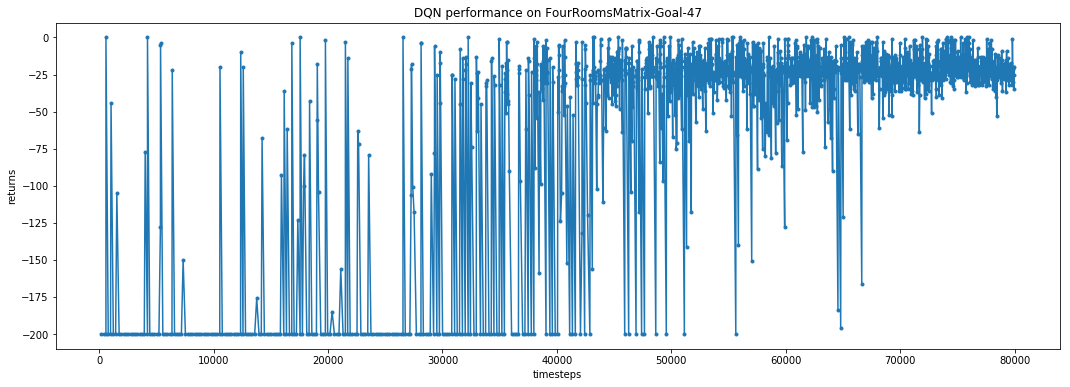

Process AsyncReplay-15:
Process AsyncReplay-17:
Process AsyncReplay-19:
Process AsyncReplay-21:
Traceback (most recent call last):
Process AsyncReplay-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/surya/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/surya/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/surya/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/mnt/c/Users/Surya Penmetsa/Desktop/McGill Courses/Thesis/code/DeepRL/deep_rl/component/replay.py", line 127, in run
    op, data = self.worker_pipe.recv()
  File "/home/surya/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/surya/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootst

In [15]:
agents = []
goals = [30, 33, 34, 36, 47]
for g in goals:
    game = 'FourRoomsMatrix-Goal-'+str(g)
    agents.append(dqn_feature(game=game))
    plt.figure(figsize=(18,6))
    plt.plot(np.array(agents[-1].returns)[:,0], np.array(agents[-1].returns)[:,1], '.-')
    plt.xlabel('timesteps'), plt.ylabel('returns')
    plt.title('DQN performance on ' + game), plt.show()

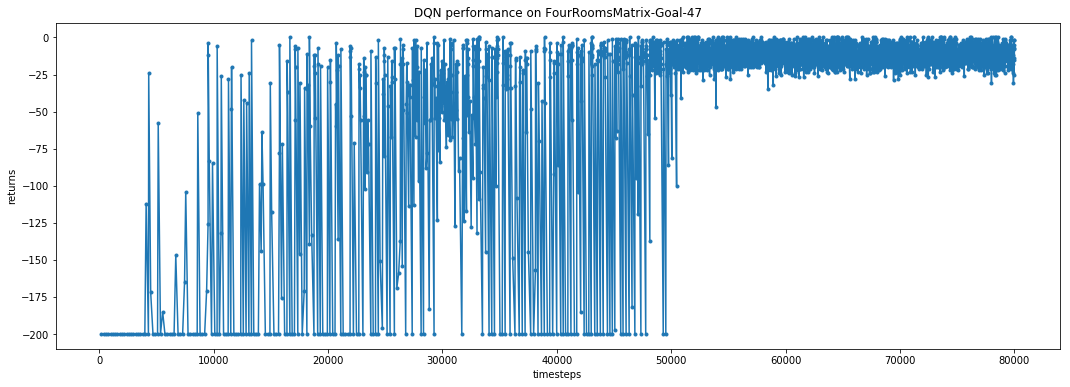

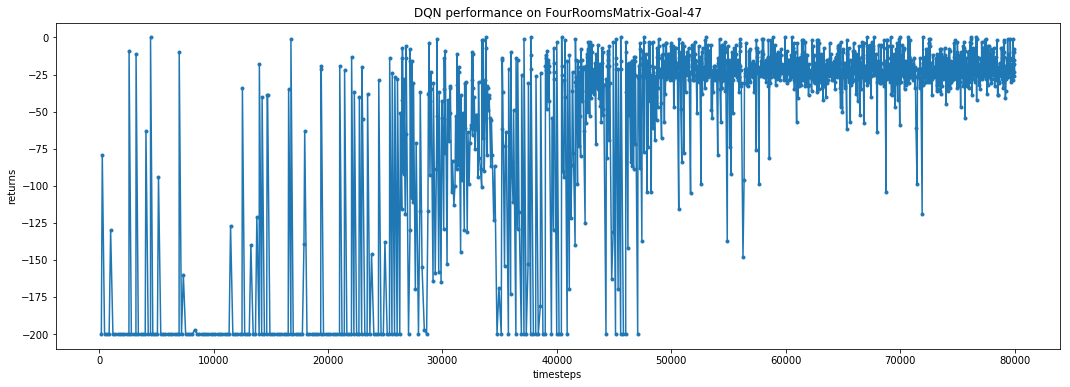

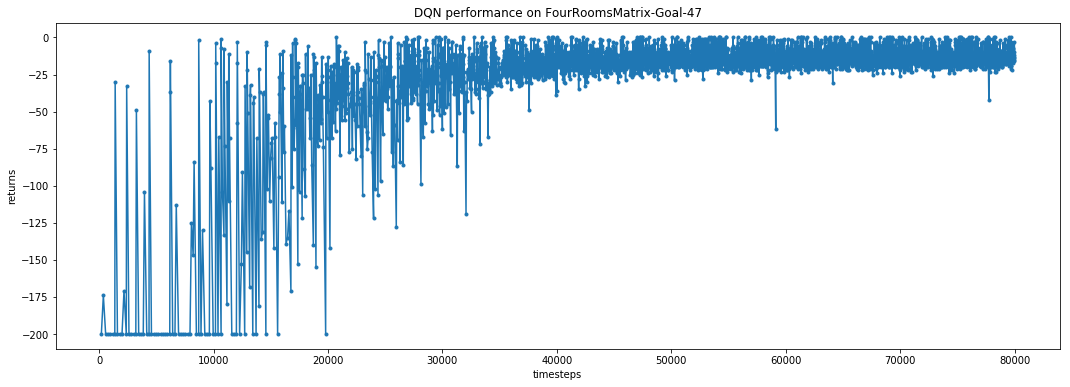

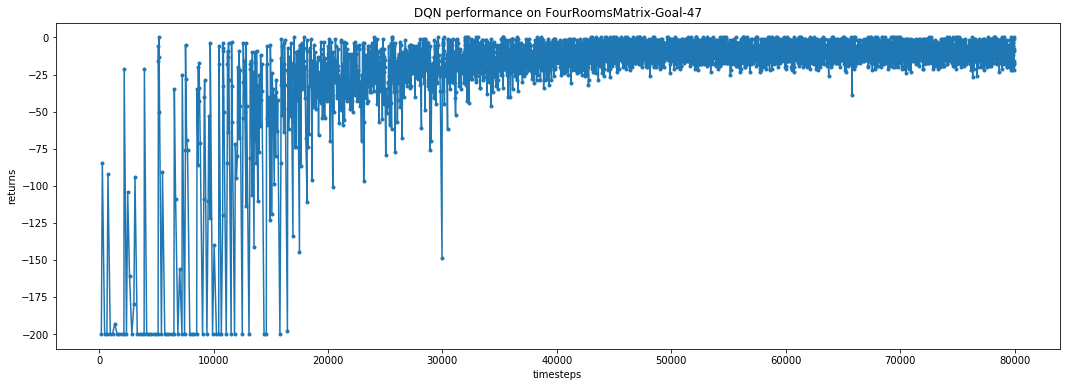

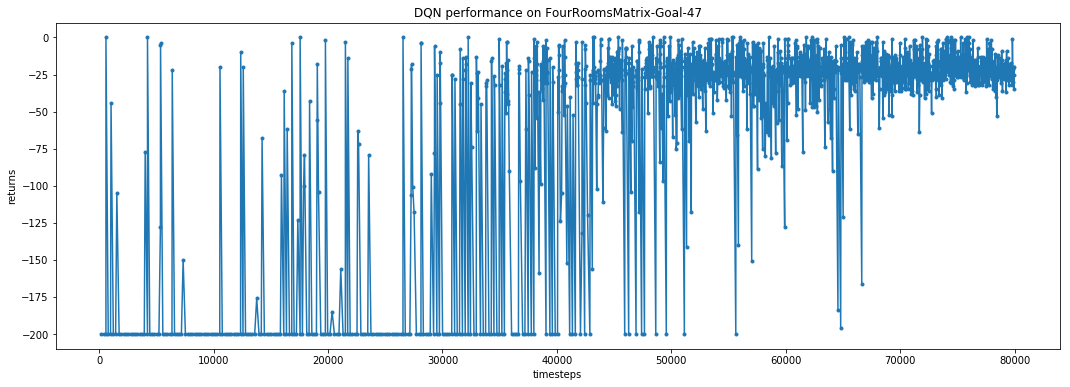

In [16]:
goals = [30, 33, 34, 36, 47]
for i, g in enumerate(goals):
#     game = 'FourRoomsMatrix-Goal-'+str(g)
#     agents.append(dqn_feature(game=game))
    plt.figure(figsize=(18,6))
    plt.plot(np.array(agents[i].returns)[:,0], np.array(agents[i].returns)[:,1], '.-')
    plt.xlabel('timesteps'), plt.ylabel('returns')
    plt.title('DQN performance on ' + game), plt.show()

In [35]:
def avdsr_feature(**kwargs):
    kwargs['tag'] = 'Training avDSR based on DQN agents'
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.002)
    config.network_fn = lambda: SRNet(config.action_dim, SRIdentityBody(config.state_dim), hidden_units=(), config=0) #CHECK
    config.replay_fn = lambda: Replay(memory_size=int(4e5), batch_size=10)

    config.random_action_prob = LinearSchedule(0.8, 0.8, 1e4) # CHECK
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 0
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.max_steps = 4e5
    config.async_actor = False
    
    agent = avDSRAgent(config, config.agents, style='DQN')
    #run_steps function below
    config = agent.config
    agent_name = agent.__class__.__name__
    t0 = time.time()
    while True:
        if config.log_interval and not agent.total_steps % config.log_interval:
            agent.logger.info('steps %d, %.2f steps/s' % (agent.total_steps, config.log_interval / (time.time() - t0)))
            t0 = time.time()
        if config.max_steps and agent.total_steps >= config.max_steps:
            return agent
            break
        agent.step()
        agent.switch_task()

In [58]:
avdsr = avdsr_feature(game='FourRoomsMatrixNoTerm', agents=agents, choice=1)

2020-06-03 13:21:31,807 - root - INFO: steps 0, 91180521.74 steps/s
2020-06-03 13:21:35,675 - root - INFO: steps 1000, 259.92 steps/s
2020-06-03 13:21:38,395 - root - INFO: steps 2000, 367.99 steps/s
2020-06-03 13:21:41,189 - root - INFO: steps 3000, 358.81 steps/s
2020-06-03 13:21:44,730 - root - INFO: steps 4000, 282.66 steps/s
2020-06-03 13:21:46,625 - root - INFO: steps 5000, 530.27 steps/s
2020-06-03 13:21:48,489 - root - INFO: steps 6000, 537.35 steps/s
2020-06-03 13:21:50,316 - root - INFO: steps 7000, 549.15 steps/s
2020-06-03 13:21:52,029 - root - INFO: steps 8000, 584.87 steps/s
2020-06-03 13:21:53,677 - root - INFO: steps 9000, 608.34 steps/s
2020-06-03 13:21:55,515 - root - INFO: steps 10000, 544.77 steps/s
2020-06-03 13:21:58,364 - root - INFO: steps 11000, 351.32 steps/s
2020-06-03 13:22:01,943 - root - INFO: steps 12000, 279.66 steps/s
2020-06-03 13:22:04,568 - root - INFO: steps 13000, 381.53 steps/s
2020-06-03 13:22:07,141 - root - INFO: steps 14000, 389.09 steps/s
202

2020-06-03 13:28:00,413 - root - INFO: steps 123000, 448.63 steps/s
2020-06-03 13:28:02,448 - root - INFO: steps 124000, 492.16 steps/s
2020-06-03 13:28:04,688 - root - INFO: steps 125000, 447.28 steps/s
2020-06-03 13:28:06,708 - root - INFO: steps 126000, 495.66 steps/s
2020-06-03 13:28:08,748 - root - INFO: steps 127000, 491.13 steps/s
2020-06-03 13:28:10,948 - root - INFO: steps 128000, 455.32 steps/s
2020-06-03 13:28:13,248 - root - INFO: steps 129000, 435.94 steps/s
2020-06-03 13:28:15,609 - root - INFO: steps 130000, 424.61 steps/s
2020-06-03 13:28:17,963 - root - INFO: steps 131000, 425.61 steps/s
2020-06-03 13:28:20,446 - root - INFO: steps 132000, 403.49 steps/s
2020-06-03 13:28:23,066 - root - INFO: steps 133000, 382.27 steps/s
2020-06-03 13:28:25,416 - root - INFO: steps 134000, 426.22 steps/s
2020-06-03 13:28:27,576 - root - INFO: steps 135000, 463.49 steps/s
2020-06-03 13:28:29,900 - root - INFO: steps 136000, 431.12 steps/s
2020-06-03 13:28:32,069 - root - INFO: steps 137

2020-06-03 13:33:09,988 - root - INFO: steps 244000, 351.36 steps/s
2020-06-03 13:33:13,086 - root - INFO: steps 245000, 323.25 steps/s
2020-06-03 13:33:16,592 - root - INFO: steps 246000, 285.73 steps/s
2020-06-03 13:33:21,442 - root - INFO: steps 247000, 206.49 steps/s
2020-06-03 13:33:28,458 - root - INFO: steps 248000, 142.63 steps/s
2020-06-03 13:33:32,025 - root - INFO: steps 249000, 280.68 steps/s
2020-06-03 13:33:35,594 - root - INFO: steps 250000, 280.66 steps/s
2020-06-03 13:33:38,986 - root - INFO: steps 251000, 295.06 steps/s
2020-06-03 13:33:42,597 - root - INFO: steps 252000, 277.17 steps/s
2020-06-03 13:33:46,843 - root - INFO: steps 253000, 235.99 steps/s
2020-06-03 13:33:51,716 - root - INFO: steps 254000, 205.46 steps/s
2020-06-03 13:33:55,033 - root - INFO: steps 255000, 302.22 steps/s
2020-06-03 13:33:58,183 - root - INFO: steps 256000, 318.33 steps/s
2020-06-03 13:34:01,059 - root - INFO: steps 257000, 348.19 steps/s
2020-06-03 13:34:03,438 - root - INFO: steps 258

2020-06-03 13:37:47,545 - root - INFO: steps 365000, 547.30 steps/s
2020-06-03 13:37:49,369 - root - INFO: steps 366000, 549.15 steps/s
2020-06-03 13:37:51,210 - root - INFO: steps 367000, 545.09 steps/s
2020-06-03 13:37:52,879 - root - INFO: steps 368000, 600.65 steps/s
2020-06-03 13:37:54,550 - root - INFO: steps 369000, 599.47 steps/s
2020-06-03 13:37:56,262 - root - INFO: steps 370000, 584.94 steps/s
2020-06-03 13:37:58,009 - root - INFO: steps 371000, 573.19 steps/s
2020-06-03 13:37:59,662 - root - INFO: steps 372000, 607.50 steps/s
2020-06-03 13:38:01,417 - root - INFO: steps 373000, 570.65 steps/s
2020-06-03 13:38:03,078 - root - INFO: steps 374000, 603.14 steps/s
2020-06-03 13:38:04,765 - root - INFO: steps 375000, 593.90 steps/s
2020-06-03 13:38:06,504 - root - INFO: steps 376000, 575.79 steps/s
2020-06-03 13:38:08,241 - root - INFO: steps 377000, 577.08 steps/s
2020-06-03 13:38:09,990 - root - INFO: steps 378000, 573.18 steps/s
2020-06-03 13:38:11,730 - root - INFO: steps 379

In [ ]:
def visualize_vector(vector, title="unnamed", show_goal=False, show=True, label=None):
    """Function to visualize vector of size 104"""
    
    current_grid = np.array(env.occupancy, dtype=np.float)
    for i in range(160):
        p_cell = env.tocell[i]
        current_grid[p_cell[0], p_cell[1]] = vector[i]

        if show_goal:
            goal_cell = env.tocell[env.goal]
            current_grid[goal_cell[0], goal_cell[1]] = -1
        
    plt.imshow(current_grid), plt.colorbar()
    plt.title(title)
    if show:
        plt.show()

state = np.zeros(len(avdsr.replay.data))
for i in range(len(avdsr.replay.data)):
    state[i] = np.argmax(avdsr.replay.data[i][0])
print(set(state))
counts = np.zeros(160)
for i in range(len(avdsr.replay.data)):
    counts[int(state[i])] += 1
plt.subplot(121)
plt.plot(counts)
plt.subplot(122)
visualize_vector(counts, title='choice = '+str(avdsr.choice))
print(avdsr.choice)

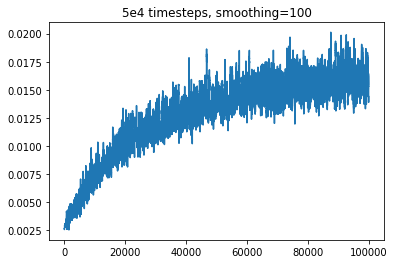

(Text(0.5,1,'5e4 timesteps, smoothing=100'), None)

In [59]:
loss_lr_em3 = avdsr.loss_vec
kernel = 100
plt.plot(convolve(avdsr.loss_vec, kernel))
plt.title('5e4 timesteps, smoothing=' + str(kernel)), plt.show()
# plt.subplot(122), plt.plot(avdsr.retu)

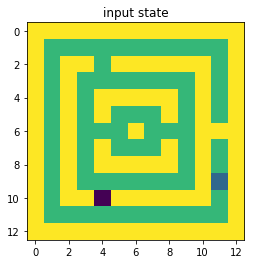

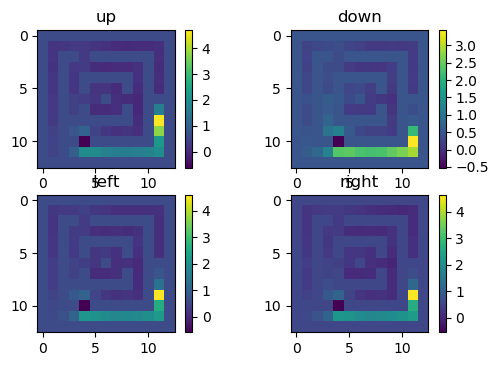

In [60]:
from deep_rl.component.fourrooms import FourRoomsMatrix
env = FourRoomsMatrix()
state = env.reset()
env.step(env.action_space.sample())
env.step(env.action_space.sample())
env.step(env.action_space.sample())
# env.current_cell = (5,5)
state, _, _, _ = env.step(env.action_space.sample())
plt.imshow(env.render()); plt.title('input state'), plt.show()
_, out, _ = avdsr.network(tensor(state).unsqueeze(0))

dirs = {0: 'up', 1: 'down', 2:'left', 3:'right'}

plt.figure(dpi=100)
psi = out.detach().numpy()
for i in range(4):
    psi_a = psi[0,i,:]
    plt.subplot(2,2,i+1)
    plt.imshow(psi_a.reshape((13,13)))
    plt.title(dirs[i])
    plt.colorbar()

plt.show()

In [28]:
params_count(avdsr.network.psi2q)

169

### Comparing performance:

Likely to improve if DSR is trained for longer with a smaller learning rate

- DQN: 169 -> 676 -> 4
- avDSR: 169 -> 676 -> 4

In [64]:
def dsr_feature_init(ref,**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: SRNet(config.action_dim, SRIdentityBody(config.state_dim), config=0)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e5), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 3e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 0
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 5e4
    config.async_actor = False
    
    agent = DSRAgent(config)
    #run_steps function below
    config = agent.config
    agent_name = agent.__class__.__name__
    if(ref is not None):
        print(agent.network.load_state_dict(ref.network.state_dict(), strict=False))
    t0 = time.time()
    while True:
        if config.save_interval and not agent.total_steps % config.save_interval:
            agent.save('data/%s-%s-%d' % (agent_name, config.tag, agent.total_steps))
        if config.log_interval and not agent.total_steps % config.log_interval:
#             agent.logger.info('steps %d, %.2f steps/s' % (agent.total_steps, config.log_interval / (time.time() - t0)))
            t0 = time.time()
        if config.eval_interval and not agent.total_steps % config.eval_interval:
            agent.eval_episodes()
        if config.max_steps and agent.total_steps >= config.max_steps:
            return agent
            break
#         import pdb; pdb.set_trace()
        agent.step()
        agent.switch_task()
        
    return agent

In [65]:
def runNAgents(function, runs, store=True, freeze=0, ref=None):
    r_dqn = []; t_dqn = []
    if(store):
        agents = []
    for i in trange(runs, desc='runs'): 
        agent = function(game='FourRoomsMatrix', freeze=freeze, ref=ref)
        rewards = np.array(agent.returns)
        t_dqn.append(rewards[:,0])
        r_dqn.append(rewards[:,1])
        if(store):
            agents.append(agent)
            
    if(store):
        return agents, t_dqn, r_dqn
    
    return t_dqn, r_dqn

In [71]:
r_c0b2 = runNAgents(dsr_feature_init, runs=3, freeze=2, ref=avdsr)
# r_c1b2 = runNAgents(dsr_feature_init, runs=3, freeze=2, ref=avdsr)
# r_dqn_base_16 = runNAgents(dqn_feature, runs=3)
# r_dqn_base_676 = runNAgents(dqn_feature, runs=3)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])


2020-06-03 13:59:37,723 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-03 13:59:45,045 - root - INFO: steps 5000, episodic_return_test -160.30(25.11)
2020-06-03 13:59:51,682 - root - INFO: steps 10000, episodic_return_test -43.10(24.82)
2020-06-03 13:59:58,113 - root - INFO: steps 15000, episodic_return_test -24.60(18.51)
2020-06-03 14:00:05,601 - root - INFO: steps 20000, episodic_return_test -84.30(29.88)
2020-06-03 14:00:13,214 - root - INFO: steps 25000, episodic_return_test -45.70(24.41)
2020-06-03 14:00:22,516 - root - INFO: steps 30000, episodic_return_test -8.70(1.75)
2020-06-03 14:00:32,485 - root - INFO: steps 35000, episodic_return_test -7.20(1.13)
2020-06-03 14:00:45,329 - root - INFO: steps 40000, episodic_return_test -10.60(1.61)
2020-06-03 14:00:55,650 - root - INFO: steps 45000, episodic_return_test -9.80(1.56)
2020-06-03 14:01:07,274 - root - INFO: steps 50000, episodic_return_test -6.60(1.03)


IncompatibleKeys(missing_keys=[], unexpected_keys=[])


2020-06-03 14:01:08,603 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-03 14:01:23,636 - root - INFO: steps 5000, episodic_return_test -141.40(28.31)
2020-06-03 14:01:36,735 - root - INFO: steps 10000, episodic_return_test -83.10(30.19)
2020-06-03 14:01:45,405 - root - INFO: steps 15000, episodic_return_test -83.80(30.01)
2020-06-03 14:01:55,237 - root - INFO: steps 20000, episodic_return_test -102.90(30.72)
2020-06-03 14:02:04,289 - root - INFO: steps 25000, episodic_return_test -65.80(27.79)
2020-06-03 14:02:13,072 - root - INFO: steps 30000, episodic_return_test -5.50(1.48)
2020-06-03 14:02:23,846 - root - INFO: steps 35000, episodic_return_test -9.60(1.31)
2020-06-03 14:02:32,144 - root - INFO: steps 40000, episodic_return_test -6.30(1.06)
2020-06-03 14:02:42,342 - root - INFO: steps 45000, episodic_return_test -6.60(1.21)
2020-06-03 14:02:51,033 - root - INFO: steps 50000, episodic_return_test -9.30(1.42)


IncompatibleKeys(missing_keys=[], unexpected_keys=[])


2020-06-03 14:02:51,922 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-03 14:03:01,417 - root - INFO: steps 5000, episodic_return_test -180.20(18.78)
2020-06-03 14:03:12,039 - root - INFO: steps 10000, episodic_return_test -102.70(30.77)
2020-06-03 14:03:22,527 - root - INFO: steps 15000, episodic_return_test -25.90(18.39)
2020-06-03 14:03:32,922 - root - INFO: steps 20000, episodic_return_test -26.40(18.34)
2020-06-03 14:03:43,692 - root - INFO: steps 25000, episodic_return_test -27.10(18.26)
2020-06-03 14:03:56,139 - root - INFO: steps 30000, episodic_return_test -43.50(24.75)
2020-06-03 14:04:06,662 - root - INFO: steps 35000, episodic_return_test -8.10(1.13)
2020-06-03 14:04:16,949 - root - INFO: steps 40000, episodic_return_test -9.50(0.74)
2020-06-03 14:04:28,100 - root - INFO: steps 45000, episodic_return_test -6.50(1.27)
2020-06-03 14:04:41,449 - root - INFO: steps 50000, episodic_return_test -10.60(1.61)


In [69]:
def plot_rewards(rewards, plot_seperate=True , clip=50000, title='unnamed'):
    smooth = 5000
    
    colors = ['red', 'blue', 'green', 'm', 'k', 'y', '#999999', 'c']
    
    plt.figure(figsize=(18,6), dpi=200)
    if(plot_seperate):
        for k, v in rewards.items():
            for t, r in zip(v[0], v[1]):
                plt.plot(t, r, label=k)
        plt.legend(), plt.show()
        return
    
    for j, (k, v) in enumerate(rewards.items()):
        r_vec = np.zeros((len(v[0]), clip-smooth+1))
        for i, (t, r) in enumerate(zip(v[0], v[1])):
            r_vec[i,:] = convolve(np.interp(np.arange(clip), t, r), smooth)
    
        mean = np.mean(np.array(r_vec), axis=0)
        std = np.std(np.array(r_vec), axis=0)
        plt.plot(mean, label=k, color=colors[j])
        plt.fill_between(np.arange(0, len(mean)), mean+std, mean-std, facecolor=colors[j], alpha=0.3)
    
    plt.xlabel('timesteps'), plt.ylabel('episodic returns')
    plt.title(title)
    plt.legend(loc='lower right'), plt.show()

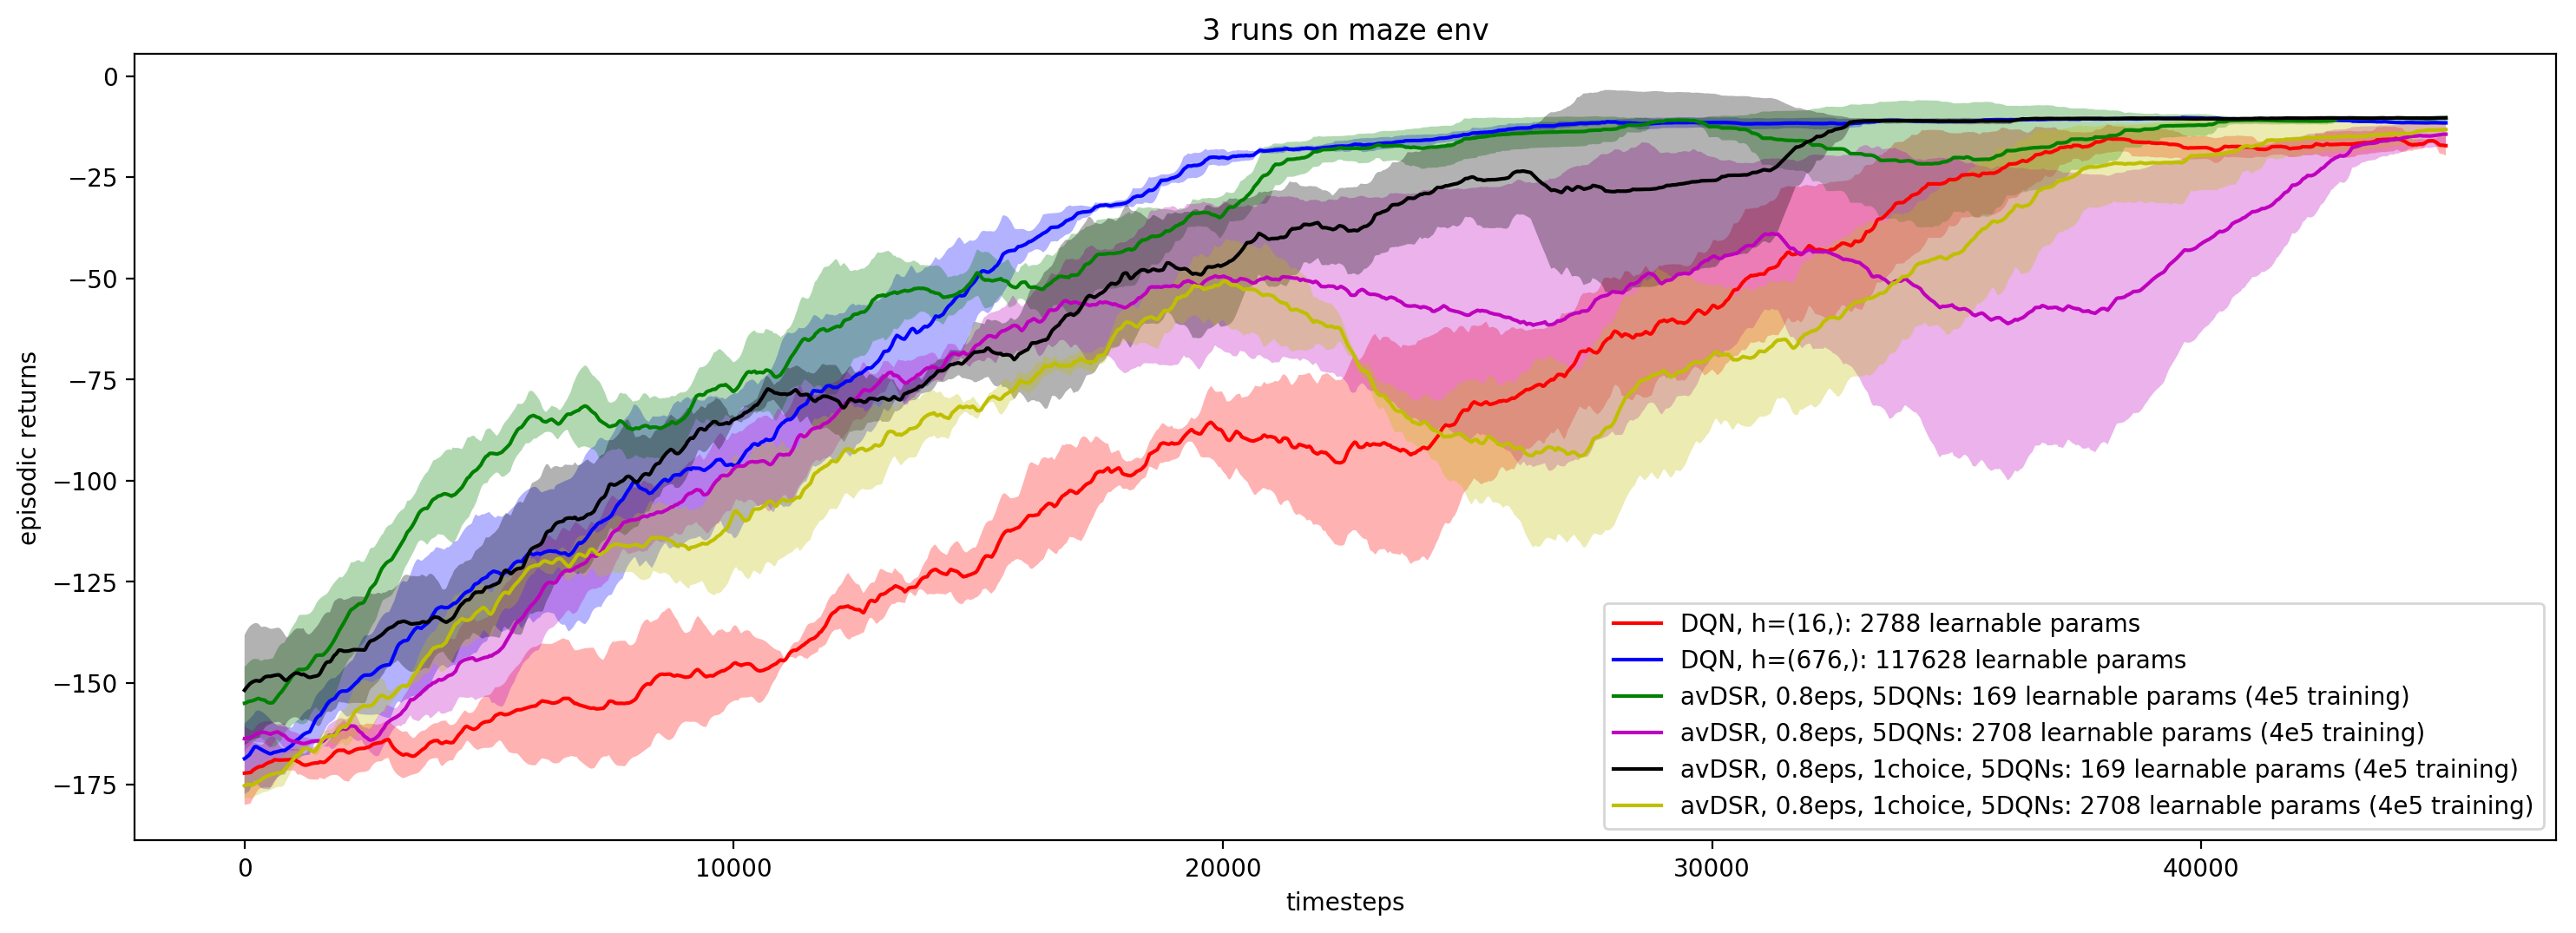

In [76]:
rewards_dict = {
                'DQN, h=(16,): 2788 learnable params': r_dqn_base_16[1:],
               'DQN, h=(676,): 117628 learnable params': r_dqn_base_676[1:],
               'avDSR, 0.8eps, 5DQNs: 169 learnable params (4e5 training)': r_c0b[1:],
               'avDSR, 0.8eps, 5DQNs: 2708 learnable params (4e5 training)': r_c1b[1:],
               'avDSR, 0.8eps, 1choice, 5DQNs: 169 learnable params (4e5 training)': r_c0b2[1:],
               'avDSR, 0.8eps, 1choice, 5DQNs: 2708 learnable params (4e5 training)': r_c1b2[1:]
               }

plot_rewards(rewards_dict, plot_seperate=False, title='3 runs on maze env')

In [24]:
import pickle
    
# with open('storage/rewards.pickle', 'wb') as f:
#     pickle.dump(rewards_dict, f, pickle.HIGHEST_PROTOCOL)
    
with open('storage/rewards.pickle', 'rb') as f:
    rewards = pickle.load(f)

r_dsr_rand = rewards['avDSR, 1eps: 169 learnable params']
r_dqn_base = rewards['DQN, h=(676,): 117628 learnable params']

### ROUGH BELOW

In [10]:
"""
Adopted from https://github.com/alversafa/option-critic-arch/blob/master/fourrooms.py.

Modified to return one hot encoded states and gym compatible.

"""

import numpy as np
from gym.utils import seeding
from gym import spaces
import gym

class FourRoomsMatrix(gym.Env):

    def __init__(self, goal=62, p=0, config=2):
        """
        config -> configouration of the state space
            0 - returns tabular index of the state
            1 - returns one hot encoded vector of the state
            2 - returns matrix form of the state
        """
        layout = """\
wwwwwwwwwwwww
w     w     w
w     w     w
w           w
w     w     w
w     w     w
ww wwww     w
w     www www
w     w     w
w     w     w
w           w
w     w     w
wwwwwwwwwwwww
"""
        self.p = p # Stocasticity the environment
        self.config = config
        self.occupancy = np.array([list(map(lambda c: 1 if c=='w' else 0, line)) for line in layout.splitlines()])
        
        # Four possible actions
        # 0: UP
        # 1: DOWN
        # 2: LEFT
        # 3: RIGHT
        self.a_space = np.array([0, 1, 2, 3])
        self.obs_space = np.zeros(np.sum(self.occupancy == 0))
        self.observation_space = spaces.Box(low=np.zeros(np.sum(self.occupancy == 0)), high=np.ones(np.sum(self.occupancy == 0)), dtype=np.uint8)
        self.action_space = spaces.Discrete(4)
        self.directions = [np.array((-1,0)), np.array((1,0)), np.array((0,-1)), np.array((0,1))]

        # Random number generator
        self.rng = np.random.RandomState(1234)

        self.tostate = {}
        statenum = 0
        for i in range(13):
            for j in range(13):
                if self.occupancy[i,j] == 0:
                    self.tostate[(i,j)] = statenum
                    statenum += 1
        self.tocell = {v:k for k, v in self.tostate.items()}


        self.goal = goal # East doorway
        self.init_states = list(range(self.obs_space.shape[0]))
        self.init_states.remove(self.goal)
        self.updates = 0
        self.horizon = 200


    def render(self, show_goal=True):
        current_grid = np.array(self.occupancy)
        current_grid[self.current_cell[0], self.current_cell[1]] = -1
        if show_goal:
            goal_cell = self.tocell[self.goal]
            current_grid[goal_cell[0], goal_cell[1]] = -2
        return current_grid

    def seed(self, seed=None):
        """
        Setting the seed of the agent for replication
        """
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        state = self.rng.choice(self.init_states)
        # state = 0 # fix starting state
        self.current_cell = self.tocell[state]
        if(self.config == 0):
            return state
        elif(self.config == 1):
            temp = np.zeros(len(self.obs_space))
            temp[state] = 1
            self.updates = 0
            return temp
        elif(self.config == 2):
            return env.render()
        else:
            raise
            

    def check_available_cells(self, cell):
        available_cells = []

        for action in range(len(self.a_space)):
            next_cell = tuple(cell + self.directions[action])

            if not self.occupancy[next_cell]:
                available_cells.append(next_cell)

        return available_cells
        

    def step(self, action):
        '''
        Takes a step in the environment with 1-self.p probability. And takes a step in the
        other directions with probability self.p with all of them being equally likely.
        '''
        self.updates += 1

        next_cell = tuple(self.current_cell + self.directions[action])

        if not self.occupancy[next_cell]:

            if self.rng.uniform() < self.p:
                available_cells = self.check_available_cells(self.current_cell)
                self.current_cell = available_cells[self.rng.randint(len(available_cells))]

            else:
                self.current_cell = next_cell

        state = self.tostate[self.current_cell]

        # When goal is reached, it is done
        done = state == self.goal

        if(done):
            reward = 0
        else:
            reward = -1

        if(self.updates>=self.horizon):
            reward = -1
            done = True

        if(self.config == 0):
            return state, reward, done, {}
        elif(self.config == 1):
            temp = np.zeros(len(self.obs_space))
            temp[state] = 1
            return temp, reward, done, {}
        elif(self.config == 2):
            return env.render, reward, done, {}

        